<a href="https://colab.research.google.com/github/SilvanaJ90/usergioarboleda-bootcamp_IA/blob/main/Semana_5_clase_miercoles_IA_innovador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial de Optimización de Modelos

# Red de capas en MNIST

Se puedes revisar el siguiente material.
[Enlace](https://universidadsergioarboleda-my.sharepoint.com/:f:/g/personal/joaquin_sanchezc_usa_edu_co/EiVd91h12EdPsBHu-1DiKBsBQwHbiaWGPbZ8g9N87ojKfQ?e=BmhPy7)

Hemos aprendido que las redes neuronales modelan la correlación. Las capas ocultas (la del medio en la red de tres capas) pueden incluso crear correlación intermedia para ayudar a resolver una tarea (aparentemente de la nada). ¿Cómo sabes que la red está creando una buena correlación?

Cuando hablamos del descenso de gradiente estocástico con entradas múltiples, hay un experimento en el que  se congela un peso y luego se pide a la red que siguiera entrenando. Mientras se entrenaba, los puntos encontraban el fondo de los cuencos, por así decirlo. Los pesos se ajustan para minimizar el error.

Cuando se congela el peso, el peso congelado seguía encontrando el fondo del bol. Por alguna razón, el cuenco se movió de forma que el valor del peso congelado pasó a ser óptimo. Además, si descongelamos el peso para hacer un poco más de entrenamiento, no aprendería. ¿Por qué? Bueno, el error ya se había reducido a 0. En lo que respecta a la red, no había nada más que aprender.
Esto nos lleva a preguntarnos, ¿y si la entrada al peso congelado fuera importante para predecir la victoria del béisbol en el mundo real? ¿Y si la red hubiera encontrado una forma de predecir con exactitud los partidos del conjunto de datos de entrenamiento (porque eso es lo que hacen las redes: minimizar el error), pero de alguna forma se hubiera olvidado de incluir una entrada valiosa?

Por desgracia, este fenómeno -el sobreajuste- es muy común en las redes neuronales. Podríamos decir que es la archienemiga de las redes neuronales; y cuanto más potente es la capacidad expresiva de la red neuronal (más capas y pesos), más propensa es a sobreadaptarse. En la investigación se libra una batalla eterna, ya que cada vez se encuentran tareas que requieren capas más potentes, pero luego hay que resolver muchos problemas para asegurarse de que la red no se sobreajuste.

Se va a estudiar los fundamentos de la regularización, que es clave para combatir el sobreajuste en las redes neuronales. Para ello, empezaremos con la red neuronal más potente (red de tres capas con capa oculta relu) en la tarea más desafiante (clasificación de dígitos MNIST).

Entrene la red, como se muestra a continuación. Debería ver los mismos resultados que en la lista. Por desgracia, la red ha aprendido a predecir perfectamente los datos de entrenamiento. ¿Deberíamos celebrarlo?

**Función de activación ReLu**

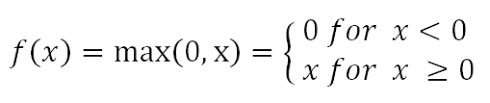

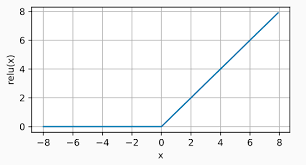

**Funcion de activación ReLu Derivada**

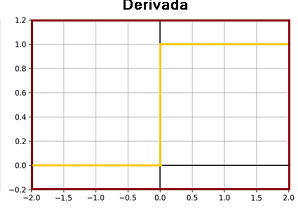

In [ ]:
import sys, numpy as np
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
images, labels = (x_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])


"""
se realiza un preprocesamiento de los datos antes de entrenar el modelo.
Primero, las imágenes se redimensionan y normalizan dividiendo cada píxel por 255 para que los valores estén en el rango de 0 a 1.
Las etiquetas se convierten en representación de "one-hot", donde se crea un vector de ceros con una longitud igual al número de clases (en este caso, 10) y se
establece en 1 el valor correspondiente a la clase de la imagen.
"""
one_hot_labels = np.zeros((len(labels),10))
for i,l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1


"""
se definen dos funciones de activación: relu y relu2deriv. La función relu devuelve el valor de entrada si es mayor o igual a cero, y devuelve cero en caso contrario.
La función relu2deriv devuelve 1 si el valor de entrada es mayor o igual a cero, y devuelve cero en caso contrario. Estas funciones se utilizarán más adelante en el código.
"""
np.random.seed(1)
relu = lambda x:(x>=0) * x # devuelve x si x > 0, devuelve 0 en caso contrario
relu2deriv = lambda x: x>=0 # devuelve 1 para entrada > 0, devuelve 0 en caso contrario


"""
se definen varios parámetros que se utilizarán en el entrenamiento del modelo, como la tasa de aprendizaje (alpha), el número de iteraciones (iterations),
el tamaño de la capa oculta (hidden_size), el número de píxeles por imagen (pixels_per_image) y el número de etiquetas (num_labels).
"""
alpha, iterations, hidden_size, pixels_per_image, num_labels = (0.005, 350, 40, 784, 10)


"""
se inicializan los pesos de las conexiones entre las capas de la red neuronal.
Los pesos se inicializan aleatoriamente utilizando la función np.random.random() y se ajustan para que estén en el rango de -0.1 a 0.1.
"""
weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1


"""
se realiza el entrenamiento del modelo utilizando un bucle for que itera sobre el número de iteraciones definido anteriormente.
En cada iteración, se calcula el error y la precisión del modelo en el conjunto de entrenamiento. Luego, se actualizan los pesos de las conexiones entre las capas
utilizando el algoritmo de retropropagación del error.
"""
for j in range(iterations):       #Simula las epocas de entrenamiento
    error, correct_cnt = (0.0, 0)

    for i in range(len(images)):  #Inicio del entrenamiento para cada imagen.
        layer_0 = images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == \
                                        np.argmax(labels[i:i+1]))

        layer_2_delta = (labels[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T)\
                                    * relu2deriv(layer_1)
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    sys.stdout.write("\r I:"+str(j)+ \
                     " Train-Err:" + str(error/float(len(images)))[0:5] +\
                     " Train-Acc:" + str(correct_cnt/float(len(images))))

11490434/11490434 [==============================] - 0s 0us/step
 I:349 Train-Err:0.108 Train-Acc:1.0

In [ ]:
if(j % 10 == 0 or j == iterations-1):
    error, correct_cnt = (0.0, 0)

    for i in range(len(test_images)):

        layer_0 = test_images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == \
                                        np.argmax(test_labels[i:i+1]))
    sys.stdout.write(" Test-Err:" + str(error/float(len(test_images)))[0:5] +\
                     " Test-Acc:" + str(correct_cnt/float(len(test_images))) + "\n")
    print()

 Test-Err:0.653 Test-Acc:0.7073



**Memorizar 1.000 imágenes es más fácil que generalizar a todas las imágenes.**

Consideremos de nuevo cómo aprende una red neuronal. Ajusta cada peso en cada matriz para que la red sea más capaz de tomar entradas específicas y hacer una predicción específica. Quizá una pregunta mejor sería: "Si la entrenamos en 1.000 imágenes, que aprende a predecir perfectamente, ¿por qué no funciona en absoluto con otras imágenes?".

Como era de esperar, cuando la red neuronal completamente entrenada se aplica a una nueva imagen, sólo se garantiza que funcione bien si la nueva imagen es casi idéntica a una imagen de los datos de entrenamiento. ¿Por qué? Porque la red neuronal aprendió a transformar los datos de entrada en datos de salida sólo para configuraciones de entrada muy específicas. Si le das algo que no le resulta familiar, predecirá al azar.

Esto hace que las redes neuronales no tengan sentido. ¿Qué sentido tiene que una red neuronal funcione sólo con los datos con los que la has entrenado? Ya conoces las clasificaciones correctas para esos datos. Las redes neuronales sólo son útiles si funcionan con datos de los que aún no conoces la respuesta.

In [ ]:
import sys, numpy as np
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

images, labels = (x_train[0:1000].reshape(1000,28*28) / 255, y_train[0:1000])

one_hot_labels = np.zeros((len(labels),10))
for i,l in enumerate(labels):
    one_hot_labels[i][l] = 1
labels = one_hot_labels

test_images = x_test.reshape(len(x_test),28*28) / 255
test_labels = np.zeros((len(y_test),10))
for i,l in enumerate(y_test):
    test_labels[i][l] = 1

np.random.seed(1)
relu = lambda x:(x>=0) * x # devuelve x si x > 0, devuelve 0 en caso contrario
relu2deriv = lambda x: x>=0 # devuelve 1 para entrada > 0, devuelve 0 en caso contrario
alpha, iterations, hidden_size, pixels_per_image, num_labels = (0.005, 350, 40, 784, 10)

weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(iterations):
    error, correct_cnt = (0.0, 0)

    for i in range(len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == \
                                        np.argmax(labels[i:i+1]))

        layer_2_delta = (labels[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T)\
                                    * relu2deriv(layer_1)
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    sys.stdout.write("\r I:"+str(j)+ \
                     " Train-Err:" + str(error/float(len(images)))[0:5] +\
                     " Train-Acc:" + str(correct_cnt/float(len(images))))

    if(j % 10 == 0 or j == iterations-1):
        error, correct_cnt = (0.0, 0)

        for i in range(len(test_images)):

            layer_0 = test_images[i:i+1]
            layer_1 = relu(np.dot(layer_0,weights_0_1))
            layer_2 = np.dot(layer_1,weights_1_2)

            error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
            correct_cnt += int(np.argmax(layer_2) == \
                                            np.argmax(test_labels[i:i+1]))
        sys.stdout.write(" Test-Err:" + str(error/float(len(test_images)))[0:5] +\
                         " Test-Acc:" + str(correct_cnt/float(len(test_images))))
        print()

 I:0 Train-Err:0.722 Train-Acc:0.537 Test-Err:0.601 Test-Acc:0.6488
 I:10 Train-Err:0.312 Train-Acc:0.901 Test-Err:0.420 Test-Acc:0.8114
 I:20 Train-Err:0.260 Train-Acc:0.93 Test-Err:0.414 Test-Acc:0.8111
 I:30 Train-Err:0.232 Train-Acc:0.946 Test-Err:0.417 Test-Acc:0.8066
 I:40 Train-Err:0.215 Train-Acc:0.956 Test-Err:0.426 Test-Acc:0.8019
 I:50 Train-Err:0.204 Train-Acc:0.966 Test-Err:0.437 Test-Acc:0.7982
 I:60 Train-Err:0.194 Train-Acc:0.967 Test-Err:0.448 Test-Acc:0.7921
 I:70 Train-Err:0.186 Train-Acc:0.975 Test-Err:0.458 Test-Acc:0.7864
 I:80 Train-Err:0.179 Train-Acc:0.979 Test-Err:0.466 Test-Acc:0.7817
 I:90 Train-Err:0.172 Train-Acc:0.981 Test-Err:0.474 Test-Acc:0.7758
 I:100 Train-Err:0.166 Train-Acc:0.984 Test-Err:0.482 Test-Acc:0.7706
 I:110 Train-Err:0.161 Train-Acc:0.984 Test-Err:0.489 Test-Acc:0.7686
 I:120 Train-Err:0.157 Train-Acc:0.986 Test-Err:0.496 Test-Acc:0.766
 I:130 Train-Err:0.153 Train-Acc:0.99 Test-Err:0.502 Test-Acc:0.7622
 I:140 Train-Err:0.149 Train-Acc:0

# Dropout en Código

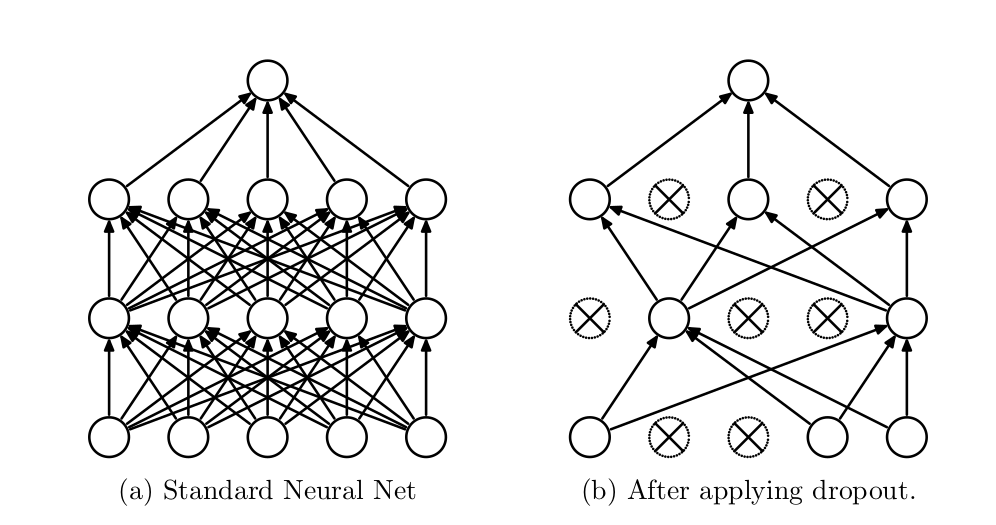

Regularización estándar de la industria: Dropout:

El método: Apagar neuronas aleatoriamente (ponerlas a 0) durante el entrenamiento.

Esta técnica de regularización es tan sencilla como parece. Durante el entrenamiento, aleatoriamente las neuronas de la red a 0 (y normalmente los deltas de los mismos nodos durante la retropropagación, pero técnicamente no es necesario). Esto hace que la red neuronal se entrene utilizando exclusivamente subsecciones aleatorias de la red neuronal.

Lo creas o no, esta técnica de regularización está generalmente aceptada como la técnica de regularización más avanzada para la gran mayoría de las redes. Su metodología es sencilla y barata, aunque la intuición de por qué funciona es un poco más compleja

Por qué funciona el dropout (quizás demasiado simplificado): Dropout hace que una red grande se comporte como una pequeña al entrenar aleatoriamente pequeñas subsecciones de la red cada vez, y las redes pequeñas no se sobreajustan.

Resulta que cuanto más pequeña es una red neuronal, menos capaz es de sobreajustarse. ¿Por qué? Bueno, las redes neuronales pequeñas no tienen mucha capacidad expresiva. No pueden captar los detalles más granulares (ruido) que suelen ser la fuente del sobreajuste. Sólo pueden captar las características grandes, obvias y de alto nivel.

Es muy importante tener en mente esta noción de espacio o capacidad.Piénsalo así.¿Recuerdas la analogía de la arcilla?Imagina que la arcilla estuviera hecha de piedras pegajosas del tamaño de monedas de diez céntimos.¿Podría esa arcilla hacer una buena impresión de un tenedor? Por supuesto que no. Esas piedras son muy parecidas a los pesos. Se forman alrededor de los datos, capturando los patrones que te interesan. Si sólo tienes unas pocas piedras grandes, no pueden captar detalles matizados. En cambio, cada piedra es empujada por grandes partes del tenedor, promediando más o menos la forma (ignorando los pliegues finos y las esquinas).

Ahora, imagine arcilla hecha de arena de grano muy fino. Está formada por millones y millones de piedrecitas que caben en todos los recovecos de una horquilla. Esto es lo que da a las grandes redes neuronales el poder expresivo que suelen utilizar para sobreajustarse a un conjunto de datos.

¿Cómo se consigue la potencia de una red neuronal grande con la resistencia al sobreajuste de la red neuronal pequeña? Toma la red neuronal grande y desactiva nodos aleatoriamente. ¿Qué ocurre cuando se toma una red neuronal grande y se utiliza sólo una pequeña parte de ella? Se comporta como una red neuronal pequeña. Pero cuando se hace esto de forma aleatoria en millones de subredes diferentes, la suma total de toda la red sigue manteniendo su poder expresivo. Genial, ¿eh?

In [ ]:
i = 0
layer_0 = images[i:i+1]
dropout_mask = np.random.randint(2,size=layer_1.shape)

layer_1 *= dropout_mask * 2
layer_2 = np.dot(layer_1, weights_1_2)

error += np.sum((labels[i:i+1] - layer_2) ** 2)

correct_cnt += int(np.argmax(layer_2) == np.argmax(labels[i+i+1]))

layer_2_delta = (labels[i:i+1] - layer_2)
layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)

layer_1_delta *= dropout_mask

weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

In [ ]:
import numpy, sys
np.random.seed(1)
def relu(x):
    return (x >= 0) * x # returns x if x > 0
                        # returns 0 otherwise

def relu2deriv(output):
    return output >= 0 #returns 1 for input > 0

alpha, iterations, hidden_size = (0.005, 300, 100)
pixels_per_image, num_labels = (784, 10)

weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(iterations):
    error, correct_cnt = (0.0,0)
    for i in range(len(images)):
        layer_0 = images[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        dropout_mask = np.random.randint(2, size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((labels[i:i+1] - layer_2) ** 2)
        correct_cnt += int(np.argmax(layer_2) == np.argmax(labels[i:i+1]))
        layer_2_delta = (labels[i:i+1] - layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
        layer_1_delta *= dropout_mask

        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    if(j%10 == 0):
        test_error = 0.0
        test_correct_cnt = 0

        for i in range(len(test_images)):
            layer_0 = test_images[i:i+1]
            layer_1 = relu(np.dot(layer_0,weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)

            test_error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
            test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))

        sys.stdout.write("\n" + \
                         "I:" + str(j) + \
                         " Test-Err:" + str(test_error/ float(len(test_images)))[0:5] +\
                         " Test-Acc:" + str(test_correct_cnt/ float(len(test_images)))+\
                         " Train-Err:" + str(error/ float(len(images)))[0:5] +\
                         " Train-Acc:" + str(correct_cnt/ float(len(images))))


I:0 Test-Err:0.641 Test-Acc:0.6333 Train-Err:0.891 Train-Acc:0.413
I:10 Test-Err:0.458 Test-Acc:0.787 Train-Err:0.472 Train-Acc:0.764
I:20 Test-Err:0.415 Test-Acc:0.8133 Train-Err:0.430 Train-Acc:0.809
I:30 Test-Err:0.421 Test-Acc:0.8114 Train-Err:0.415 Train-Acc:0.811
I:40 Test-Err:0.419 Test-Acc:0.8112 Train-Err:0.413 Train-Acc:0.827
I:50 Test-Err:0.409 Test-Acc:0.8133 Train-Err:0.392 Train-Acc:0.836
I:60 Test-Err:0.412 Test-Acc:0.8236 Train-Err:0.402 Train-Acc:0.836
I:70 Test-Err:0.412 Test-Acc:0.8033 Train-Err:0.383 Train-Acc:0.857
I:80 Test-Err:0.410 Test-Acc:0.8054 Train-Err:0.386 Train-Acc:0.854
I:90 Test-Err:0.411 Test-Acc:0.8144 Train-Err:0.376 Train-Acc:0.868
I:100 Test-Err:0.411 Test-Acc:0.7903 Train-Err:0.369 Train-Acc:0.864
I:110 Test-Err:0.411 Test-Acc:0.8003 Train-Err:0.371 Train-Acc:0.868
I:120 Test-Err:0.402 Test-Acc:0.8046 Train-Err:0.353 Train-Acc:0.857
I:130 Test-Err:0.408 Test-Acc:0.8091 Train-Err:0.352 Train-Acc:0.867
I:140 Test-Err:0.405 Test-Acc:0.8083 Train-Er

# Batch Gradient Descent

He aquí un método para aumentar la velocidad de entrenamiento y la tasa de de convergencia.

En el contexto de esta sección, me gustaría aplicar brevemente un concepto introducido: el descenso de gradiente estocástico en mini lotes. Antes entrenábamos un ejemplo de entrenamiento cada vez, actualizando los pesos después de cada ejemplo. Ahora, vamos a entrenar 100 ejemplos de entrenamiento a la vez, promediando las actualizaciones de pesos entre los 100 ejemplos. A continuación se muestra el resultado del entrenamiento/prueba, seguido del código de la lógica de entrenamiento.

Observe que la precisión del entrenamiento tiene una tendencia más suave que antes. Tomar una actualización de pesos media de forma consistente crea este tipo de fenómeno durante el entrenamiento. Resulta que los ejemplos de entrenamiento individuales son muy ruidosos en términos de las actualizaciones de peso que generan. Por tanto, promediarlas hace que el proceso de aprendizaje sea más suave.

Lo primero que notarás al ejecutar este código es que se ejecuta mucho más rápido. Esto se debe a que cada función np.dot está realizando 100 productos punto vectoriales a la vez. Las arquitecturas de CPU son mucho más rápidas realizando productos punto por lotes de esta manera.

Sin embargo, aquí pasa algo más. Observa que alfa es 20 veces mayor que antes. Puedes aumentarlo por una razón fascinante. Imagina que estuvieras tratando de encontrar una ciudad usando una brújula muy tambaleante. Si miras hacia abajo, obtienes un rumbo, y luego corres 2 millas, probablemente...
estarías muy desviado. Pero si miras hacia abajo, tomas 100 rumbos y luego los promedias, correr 3 kilómetros probablemente te llevará en la dirección correcta.

Debido a que el ejemplo toma un promedio de una señal ruidosa (el cambio de peso promedio sobre 100 ejemplos de entrenamiento), puede tomar pasos más grandes. Por lo general, los lotes van desde un tamaño de 8 hasta 256. Generalmente, los investigadores eligen números al azar hasta que encuentran un par batch_size/alpha que parece funcionar bien.


In [ ]:
import numpy as np
np.random.seed(1)

def relu(x):
    return (x >= 0) * x # returns x if x > 0

def relu2deriv(output):
    return output >= 0 # returns 1 for input > 0

batch_size = 100
alpha, iterations = (0.001, 300)
pixels_per_image, num_labels, hidden_size = (784, 10, 100)

weights_0_1 = 0.2*np.random.random((pixels_per_image,hidden_size)) - 0.1
weights_1_2 = 0.2*np.random.random((hidden_size,num_labels)) - 0.1

for j in range(iterations):
    error, correct_cnt = (0.0, 0)
    for i in range(int(len(images) / batch_size)):
        batch_start, batch_end = ((i * batch_size),((i+1)*batch_size))

        layer_0 = images[batch_start:batch_end]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        dropout_mask = np.random.randint(2,size=layer_1.shape)
        layer_1 *= dropout_mask * 2
        layer_2 = np.dot(layer_1,weights_1_2)

        error += np.sum((labels[batch_start:batch_end] - layer_2) ** 2)
        for k in range(batch_size):
            correct_cnt += int(np.argmax(layer_2[k:k+1]) == np.argmax(labels[batch_start+k:batch_start+k+1]))

            layer_2_delta = (labels[batch_start:batch_end]-layer_2)/batch_size
            layer_1_delta = layer_2_delta.dot(weights_1_2.T)* relu2deriv(layer_1)
            layer_1_delta *= dropout_mask

            weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
            weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)

    if(j%10 == 0):
        test_error = 0.0
        test_correct_cnt = 0

        for i in range(len(test_images)):
            layer_0 = test_images[i:i+1]
            layer_1 = relu(np.dot(layer_0,weights_0_1))
            layer_2 = np.dot(layer_1, weights_1_2)

            test_error += np.sum((test_labels[i:i+1] - layer_2) ** 2)
            test_correct_cnt += int(np.argmax(layer_2) == np.argmax(test_labels[i:i+1]))

        sys.stdout.write("\n" + \
                         "I:" + str(j) + \
                         " Test-Err:" + str(test_error/ float(len(test_images)))[0:5] +\
                         " Test-Acc:" + str(test_correct_cnt/ float(len(test_images)))+\
                         " Train-Err:" + str(error/ float(len(images)))[0:5] +\
                         " Train-Acc:" + str(correct_cnt/ float(len(images))))


I:0 Test-Err:0.815 Test-Acc:0.3832 Train-Err:1.284 Train-Acc:0.165
I:10 Test-Err:0.568 Test-Acc:0.7173 Train-Err:0.591 Train-Acc:0.672
I:20 Test-Err:0.510 Test-Acc:0.7571 Train-Err:0.532 Train-Acc:0.729
I:30 Test-Err:0.485 Test-Acc:0.7793 Train-Err:0.498 Train-Acc:0.754
I:40 Test-Err:0.468 Test-Acc:0.7877 Train-Err:0.489 Train-Acc:0.749
I:50 Test-Err:0.458 Test-Acc:0.793 Train-Err:0.468 Train-Acc:0.775
I:60 Test-Err:0.452 Test-Acc:0.7995 Train-Err:0.452 Train-Acc:0.799
I:70 Test-Err:0.446 Test-Acc:0.803 Train-Err:0.453 Train-Acc:0.792
I:80 Test-Err:0.451 Test-Acc:0.7968 Train-Err:0.457 Train-Acc:0.786
I:90 Test-Err:0.447 Test-Acc:0.795 Train-Err:0.454 Train-Acc:0.799
I:100 Test-Err:0.448 Test-Acc:0.793 Train-Err:0.447 Train-Acc:0.796
I:110 Test-Err:0.441 Test-Acc:0.7943 Train-Err:0.426 Train-Acc:0.816
I:120 Test-Err:0.442 Test-Acc:0.7966 Train-Err:0.431 Train-Acc:0.813
I:130 Test-Err:0.441 Test-Acc:0.7906 Train-Err:0.434 Train-Acc:0.816
I:140 Test-Err:0.447 Test-Acc:0.7874 Train-Err:0

# Implementación de Batch Gradient Descent desde cero:

**Implementa el algoritmo de Batch Gradient Descent en python.**
*  Utiliza una función de pérdida simple, como el error cuadrático medio, y una función de activación como la sigmoide.
* Aplica el algoritmo para ajustar los parámetros de un modelo de regresión lineal simple.

**Entrenamiento de una red neuronal con Batch Gradient Descent:**

* Utiliza una biblioteca de deep learning como TensorFlow o PyTorch.
Carga un conjunto de datos como MNIST o CIFAR-10.
* Define una arquitectura de red neuronal convolucional simple.
* Implementa el algoritmo de Batch Gradient Descent para entrenar el modelo en el conjunto de datos.
* Experimenta con diferentes tasas de aprendizaje y observa cómo afectan la convergencia del modelo.

**Comparación con Stochastic Gradient Descent (SGD):**

* Implementa también el algoritmo de Stochastic Gradient Descent.
* Compara el rendimiento y la velocidad de convergencia de Batch
* Gradient Descent y SGD en el mismo conjunto de datos y modelo.

**Exploración de hiperparámetros:**

* Experimenta con diferentes tamaños de lote (batch sizes) en Batch Gradient Descent y observa cómo afecta la convergencia y la eficiencia computacional.
* Varía la tasa de aprendizaje y observa cómo afecta la convergencia del modelo.

**Visualización de la convergencia:**

* Grafica la función de pérdida en función del número de iteraciones durante el entrenamiento para observar cómo converge el modelo.
* Compara las curvas de aprendizaje de diferentes configuraciones de hiperparámetros.

**A continuación una guía de la implementación**

Este código carga el conjunto de datos MNIST, define un modelo de red neuronal simple, compila el modelo con el optimizador SGD (Batch Gradient Descent), y entrena el modelo utilizando lotes de datos generados de forma aleatoria. Finalmente, se evalúa el modelo en el conjunto de prueba y se imprime la precisión obtenida.

Puedes ajustar los hiperparámetros como el tamaño del lote (batch_size), la tasa de aprendizaje (learning_rate), y el número de épocas (epochs) según sea necesario para experimentar con diferentes configuraciones.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import SGD
import numpy as np

# Cargar el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar los datos
x_train, x_test = x_train / 255.0, x_test / 255.0

# Definir el modelo
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer=SGD(learning_rate=0.1),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Función para generar lotes de datos
def generate_batches(X, y, batch_size):
    num_samples = X.shape[0]
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    for start_idx in range(0, num_samples, batch_size):
        end_idx = min(start_idx + batch_size, num_samples)
        batch_indices = indices[start_idx:end_idx]
        yield X[batch_indices], y[batch_indices]

# Entrenar el modelo con Batch Gradient Descent
batch_size = 32
epochs = 5
steps_per_epoch = len(x_train) // batch_size

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for step, (x_batch, y_batch) in enumerate(generate_batches(x_train, y_train, batch_size), 1):
        loss, acc = model.train_on_batch(x_batch, y_batch)
        if step % 100 == 0:
            print(f"Step {step}/{steps_per_epoch}, Loss: {loss}, Accuracy: {acc}")

# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")


Epoch 1/5
Step 100/1875, Loss: 0.30729982256889343, Accuracy: 0.90625
Step 200/1875, Loss: 0.16387313604354858, Accuracy: 0.96875
Step 300/1875, Loss: 0.420432984828949, Accuracy: 0.84375
Step 400/1875, Loss: 0.1415846049785614, Accuracy: 0.96875
Step 500/1875, Loss: 0.17214006185531616, Accuracy: 0.96875
Step 600/1875, Loss: 0.4849717617034912, Accuracy: 0.8125
Step 700/1875, Loss: 0.3318372368812561, Accuracy: 0.9375
Step 800/1875, Loss: 0.5532748699188232, Accuracy: 0.8125
Step 900/1875, Loss: 0.4799802601337433, Accuracy: 0.96875
Step 1000/1875, Loss: 0.12948213517665863, Accuracy: 0.96875
Step 1100/1875, Loss: 0.05242069065570831, Accuracy: 1.0
Step 1200/1875, Loss: 0.5177134871482849, Accuracy: 0.875
Step 1300/1875, Loss: 0.16264624893665314, Accuracy: 0.9375
Step 1400/1875, Loss: 0.21459344029426575, Accuracy: 0.90625
Step 1500/1875, Loss: 0.13831762969493866, Accuracy: 0.9375
Step 1600/1875, Loss: 0.11071734875440598, Accuracy: 0.96875
Step 1700/1875, Loss: 0.2776101231575012, 

# Prube haciendo la aplicación del concepto a otros conjuntos de datos

In [ ]:
#Acá va la solución